In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#url = 'https://github.com/zozunin/project/blob/main/HW_2_v13.xls?raw=true'

filepath = 'HW_2_v13.xls'
cols = ['Возраст (лет)', 'Количество иждивенцев', 'Доход (руб./мес.)',
        'Срок проживания в регионе (лет)','Оценка автомобиля заемщика (USD)',
        'Размер кредита(тыс. руб.)']
X = pd.read_excel(filepath, header=None)
X.columns = cols
X.head(10)

,Возраст (лет),Количество иждивенцев,Доход (руб./мес.),Срок проживания в регионе (лет),Оценка автомобиля заемщика (USD),Размер кредита(тыс. руб.)
0,37,1,7400,9,7000,70000
1,45,3,33100,12,34000,337000
2,32,1,18700,5,17000,176000
3,39,2,29100,9,29000,289000
4,33,1,11400,6,10000,104000
5,28,1,20100,2,18000,184000
6,47,2,4400,15,6000,55000
7,36,2,30500,7,30000,299000
8,45,3,32300,12,33000,330000
9,39,2,25900,9,26000,258000


## Изучение данных

In [3]:
X.describe()

,Возраст (лет),Количество иждивенцев,Доход (руб./мес.),Срок проживания в регионе (лет),Оценка автомобиля заемщика (USD),Размер кредита(тыс. руб.)
count,50.000000,50.000000,50.0000,50.000000,50.00,50.000000
mean,39.960000,2.020000,20052.0000,10.100000,20060.00,200100.000000
std,8.025368,1.020004,9897.8299,4.900021,10027.33,99924.308088
min,19.000000,0.000000,2000.0000,0.000000,0.00,3000.000000
25%,35.250000,1.000000,10950.0000,7.000000,11000.00,106750.000000
50%,40.000000,2.000000,19800.0000,10.000000,19500.00,193500.000000
75%,45.000000,2.750000,28925.0000,13.000000,28750.00,286000.000000
max,59.000000,4.000000,38600.0000,22.000000,38000.00,382000.000000


## PCA

- Выполнить центрирование данных и такую нормировку, что евклидова норма каждого признака равна 1 (полученная матрица обозначается через Z).

In [4]:
# центрирование и нормализация
Z = X - X.mean()
norms = [np.linalg.norm(Z[i]) for i in Z.columns]
Z = Z/norms

Проверим, равна ли норма после центрирования и нормализации 1

In [5]:
np.linalg.norm(Z['Возраст (лет)'])

1.0

- Найти SVD разложение матрицы Z (матрицы U, S, V). **Докажите, что при выбранной нормировке, коэффициенты разложения столбцов матрицы Z по скрытым факторам являются корреляциями этих столбцов и скрытых факторов.**

In [6]:
U, S, VT = np.linalg.svd(Z)

 - Исследуйте, сколько скрытых факторов (главные факторы) достаточно для хорошей аппроксимации матрицы данных Z. Заменить значения исходных признаков линейными комбинациями главных факторов (матрица Zk, k – число главных факторов). Оценить погрешность аппроксимации в евклидовой матричной  норме и норме Фробениуса. 

In [7]:
ev_table = pd.DataFrame()

pc_num = [i+1 for i in range(len(S))]
ev_table[0] = pc_num
ev_table[1] = S.round(2)
qrS = S ** 2
ev_table[2] = qrS.round(2)
percentvar = [round(i/6.0*100,2) for i in S**2]
ev_table[3] = percentvar
ev_table[4] = np.cumsum(percentvar)

ev_table.columns=['Главные факторы', 'Сингулярные значения',
                                'Собственные значения', 'Вклад в вариацию(%)',
                                'Кумулятивный вклад в вариацию(%)']
ev_table

,Главные факторы,Сингулярные значения,Собственные значения,Вклад в вариацию(%),Кумулятивный вклад в вариацию(%)
0,1,1.84,3.38,56.39,56.39
1,2,1.60,2.55,42.51,98.90
2,3,0.24,0.06,0.99,99.89
3,4,0.07,0.01,0.09,99.98
4,5,0.03,0.00,0.02,100.00
5,6,0.01,0.00,0.00,100.00


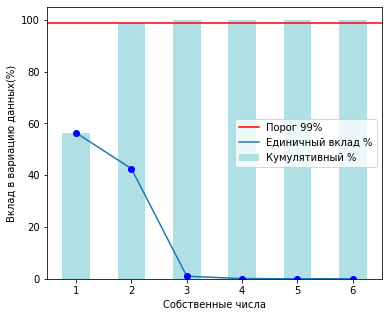

In [8]:
plt.figure(figsize=(6,5))
plt.bar(pc_num, np.cumsum(percentvar), color='powderblue', width=0.5,
       label='Кумулятивный %')
plt.axhline(y=99, color='r', linestyle='-', label='Порог 99%')
plt.plot(pc_num, percentvar, label='Единичный вклад %')
plt.plot(pc_num, percentvar, 'bo')
plt.xlabel('Собственные числа')
plt.ylabel('Вклад в вариацию данных(%)')
plt.legend(loc='center right')
plt.show()

Видно, что основной вклад вносят два первых главных фактора.

In [9]:
print("Два главных фактора вносят {}% в вариацию данных".format(sum(percentvar[:2])))

#||A −Ak||2 = σk+1
print("Ошибка аппроксимации в евклидовой матричной норме, где k=2: ", round(S[2], 2))
 
# ||A −Ak||2F = σ2k+1 + ... + σ2p
fr_error = round(sum(S[2:]**2),2)
print("Ошибка аппроксимации в норме Фробениуса, где k=2: ", fr_error)

"""|Z −Zk||2F / ||Z||2F
= (s2k+1 + s2k+2 + ... + s2p)/
s21 + s22 + ... + s2k + s2k+1 + ... + s2p"""
rel_fr_error = round(sum(S[2:]**2)/sum(S**2)*100, 2)
# или 100 - 98.9
print("Относительная ошибка аппроксимации в норме Фробениуса, где k=2: {}%".format(rel_fr_error))

Два главных фактора вносят 98.9% в вариацию данных
Ошибка аппроксимации в евклидовой матричной норме, где k=2:  0.24
Ошибка аппроксимации в норме Фробениуса, где k=2:  0.07
Относительная ошибка аппроксимации в норме Фробениуса, где k=2: 1.1%


In [10]:
# заменяем признаки двумя
SVT = np.dot(np.diag(S[:2]), VT[:2])
Zk = np.dot(U.T[:2].T,SVT)
#Zk = np.dot(U.T[:2].T, np.diag(S[:2])), VT[:2])

- Сравнить матрицы корреляций признаков для матрицы Z и матрицы Zk. Оценить качество аппроксимации по близости матриц корреляций (можно использовать относительную погрешность в одной из матричных норм) 

In [11]:
corrZ = Z.corr()
Zkdf = pd.DataFrame(Zk, columns = Z.columns )
corrZk = Zkdf.corr()

<AxesSubplot:>

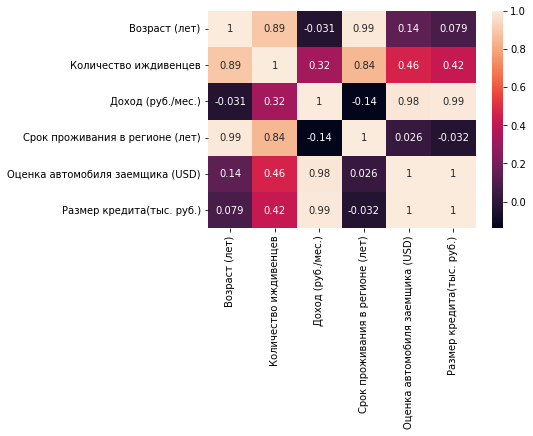

In [12]:
sns.heatmap(corrZ,annot=True)

<AxesSubplot:>

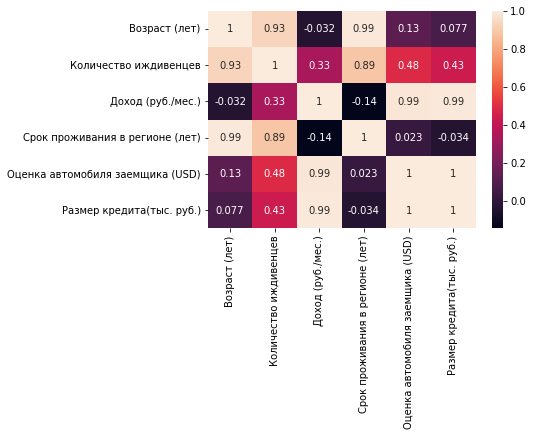

In [13]:
sns.heatmap(corrZk,annot=True)

Качество аппроксимации по близости матриц с использованием нормы Фробениуса

In [14]:
np.linalg.norm(corrZ, 'fro') - np.linalg.norm(corrZk, 'fro')

-0.046915889624025375



- Используя выделенные главные факторы, найти представления клиентов векторами меньшей размерности (размерности k).
- Используя представление клиентов векторами меньшей размерности, построить карту клиентов. Сделать выводы о клиентах банка. 


Матрицы нагрузок и вращение

In [15]:
VT[:2].T # карта признаков

array([[ 0.31027213, -0.51019506],
       [ 0.44262039, -0.34078805],
       [ 0.43491699,  0.37524008],
       [ 0.25912528, -0.5465919 ],
       [ 0.48246293,  0.28714921],
       [ 0.46770633,  0.31865656]])

Получим матрицу нагрузок:

In [16]:
SVT.T

array([[ 0.57070095, -0.81480509],
       [ 0.81413655, -0.54425426],
       [ 0.79996724,  0.59927575],
       [ 0.47662369, -0.87293252],
       [ 0.88742117,  0.45859056],
       [ 0.86027853,  0.50890925]])

Ясной картины нагрузки не дают, поэтому будем вращать.

Попробуем три способа:
1. простой поворот на 45 градусов
2. варимакс
3. квартимакс

In [17]:
simple_mtx = [[0.71, -0.71], [0.71, 0.71]] # 45 градусов по часовой
G = np.array(simple_mtx)
simple_loadings = np.dot(G.T, SVT)
simple_loadings.T

array([[-0.17331394, -0.98370929],
       [ 0.19161643, -0.96445747],
       [ 0.99346252, -0.14249096],
       [-0.28137927, -0.95818491],
       [ 0.95566833, -0.30446974],
       [ 0.97212333, -0.24947219]])

После простого поворота корреляции стали значительно виднее. 
* от первого фактора: 3, 5, 6
* от второго фактора: 1, 2, 4

In [18]:
#! pip install factor_analyzer
from factor_analyzer import Rotator

После применения метода варимакс получаем недостаточно четкие результаты по 6 признаку, в остальном - совпадает с простым поворотом на 45 градусов.

In [19]:
loadings = pd.DataFrame(SVT.T)
varirot = Rotator(method='varimax')
varimax_loadings = varirot.fit_transform(loadings)
varimax_mtx = varirot.rotation_
varimax_loadings

array([[ 3.40243576e-04, -9.94789822e-01],
       [ 3.54915907e-01, -9.12724340e-01],
       [ 9.99018708e-01,  3.22588524e-02],
       [-1.10065150e-01, -9.88466991e-01],
       [ 9.89996713e-01, -1.33147067e-01],
       [ 9.96612829e-01, -7.63586776e-02]])

Квартимакс дает самые однозначные результаты:
* от первого фактора: 3, 5, 6
* от второго фактора: 1, 2, 4

In [20]:
quartirot = Rotator(method='quartimax')
quartimax_loadings = quartirot.fit_transform(loadings)
quartimax_mtx = quartirot.rotation_
quartimax_loadings

array([[ 0.00987027, -0.99474091],
       [ 0.36364348, -0.90928238],
       [ 0.99866383,  0.04182793],
       [-0.10059063, -0.98947605],
       [ 0.99122683, -0.12365683],
       [ 0.99729861, -0.06680767]])

In [27]:
# переход к другому базису
Zk2 = np.dot( np.dot(U.T[:2].T, quartimax_mtx.T), quartimax_loadings.T)